In [1]:
import pandas as pd
train = pd.read_csv("/home/guruji/Elthive Class/End_sub/training_set.csv")
test = pd.read_csv("/home/guruji/Elthive Class/End_sub/testing_set.csv")

from warnings import filterwarnings 
filterwarnings('ignore')

pd.set_option("display.max_columns",100)
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [3]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [4]:
train = train.drop(labels=['Loan_ID'],axis=1)

In [5]:
train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
for i in train.columns:
    if (train[i].dtype!='object'):
        x = train[i].mean()
        train[i] = train[i].fillna(x)
    else:
            x = train[i].mode()[0]
            train[i] = train[i].fillna(x)
        
for i in test.columns:
    if (test[i].dtype!='object'):
        x = test[i].mean()
        test[i] = test[i].fillna(x)
    else:
            x = test[i].mode()[0]
            test[i] = test[i].fillna(x)

In [8]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [10]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [11]:
 cat = []
con = []
for i in train.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
from Pre_Files import ANOVA 
ANOVA(train,"Loan_Status","ApplicantIncome")

0.90252

In [13]:
for i in con:
    print('Loan_Status &',i,' \t-->',ANOVA(train,'Loan_Status',i))

Loan_Status & ApplicantIncome  	--> 0.90252
Loan_Status & CoapplicantIncome  	--> 0.14239
Loan_Status & LoanAmount  	--> 0.36769
Loan_Status & Loan_Amount_Term  	--> 0.60396
Loan_Status & Credit_History  	--> 0.0


In [14]:
X = train.drop(labels=['Loan_Status'],axis=1)
Y = train[['Loan_Status']]

In [15]:
cat.remove('Loan_Status')

In [16]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [17]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])

In [19]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,1


In [20]:
train['Loan_Status'].unique()

array([1, 0])

In [21]:
X1 = X[con]

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(X[cat]).toarray()

In [23]:
X2

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [24]:
cols = ohe.get_feature_names_out()
cols

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [25]:
X2 = pd.DataFrame(X2,columns=cols)

In [26]:
X2.head(5)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
Xnew = X1.join(X2)

In [28]:
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,5405.54085,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.00000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.00000,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,6000.00000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.3,random_state=41)

In [30]:
xtrain.shape

(429, 20)

In [31]:
xtest.shape

(185, 20)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(max_depth=2)
dtc_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

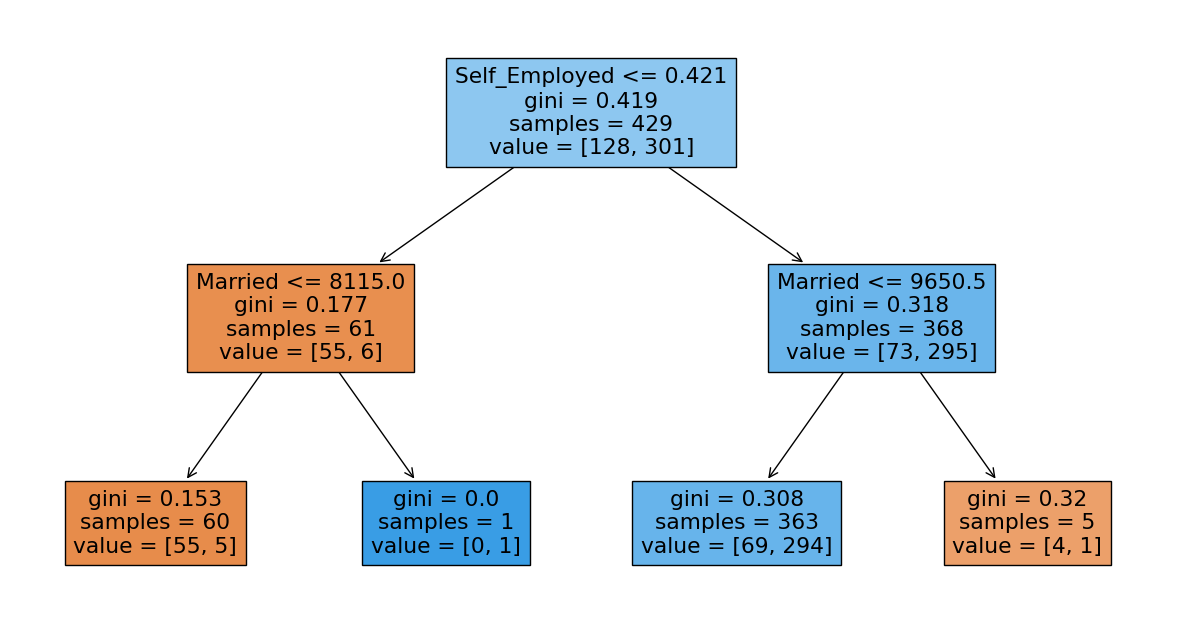

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
from sklearn.tree import plot_tree
plot_tree(dtc_model,feature_names=X.columns,filled=True)
plt.show()

In [34]:
tr_pred = dtc_model.predict(xtrain)
ts_pred = dtc_model.predict(xtest)

In [35]:
tr_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [36]:
ts_pred

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y

In [37]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Accuracy :',tr_acc)
print('Testing Accuracy  :',ts_acc)

Training Accuracy : 0.8251748251748252
Testing Accuracy  : 0.7891891891891892


In [38]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ts_pred)
cf

array([[ 26,  38],
       [  1, 120]])

<Axes: >

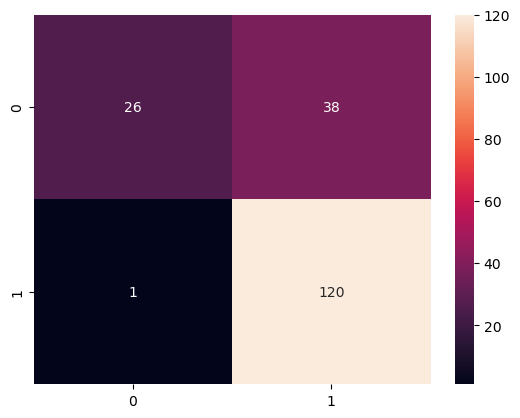

In [39]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           N       0.96      0.41      0.57        64
           Y       0.76      0.99      0.86       121

    accuracy                           0.79       185
   macro avg       0.86      0.70      0.72       185
weighted avg       0.83      0.79      0.76       185



In [41]:
params = {'max_depth':[1,2,3],
          'min_samples_leaf':[1,2,3],
          'criterion':['gini','entropy']}

In [42]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(dtc_model,param_grid=params,cv=5)
best_model = gscv.fit(xtrain,ytrain)
best_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3]})

In [43]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

In [44]:
gscv.best_score_

0.8157865937072504

In [45]:
ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.8158508158508159, 0.7945945945945946)

In [46]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[ 27,  37],
       [  1, 120]])

<Axes: >

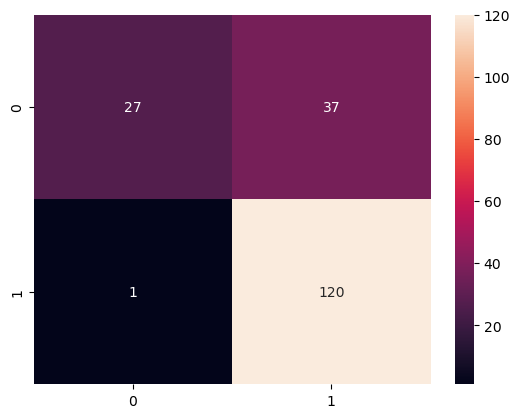

In [47]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           N       0.96      0.42      0.59        64
           Y       0.76      0.99      0.86       121

    accuracy                           0.79       185
   macro avg       0.86      0.71      0.73       185
weighted avg       0.83      0.79      0.77       185



In [49]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dtc_model, n_estimators=30)
abc_model = abc.fit(xtrain,ytrain)

In [50]:
ypred_tr = abc_model.predict(xtrain)
ypred_ts = abc_model.predict(xtest)

tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.9277389277389277, 0.7189189189189189)

In [51]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[ 25,  39],
       [ 13, 108]])

<Axes: >

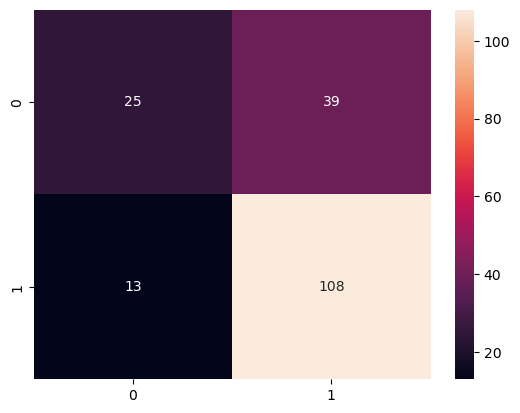

In [52]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           N       0.66      0.39      0.49        64
           Y       0.73      0.89      0.81       121

    accuracy                           0.72       185
   macro avg       0.70      0.64      0.65       185
weighted avg       0.71      0.72      0.70       185



In [54]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=20)
knc_model = knc.fit(xtrain,ytrain)

In [55]:
ypred_tr = knc_model.predict(xtrain)
ypred_ts = knc_model.predict(xtest)

tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.7086247086247086, 0.6378378378378379)

In [56]:
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[  4,  60],
       [  7, 114]])

<Axes: >

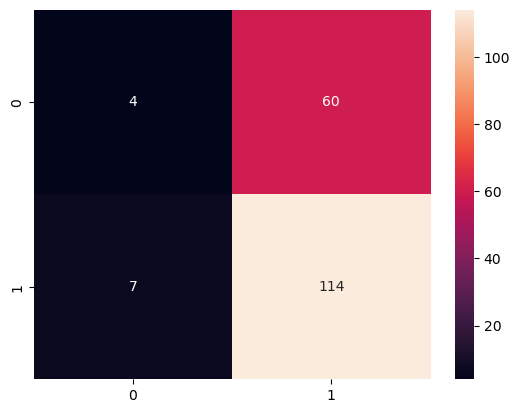

In [57]:
sb.heatmap(cf,annot=True,fmt='d')

In [58]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=21)
gscv = GridSearchCV(rfc,param_grid=params,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='f1_macro')

In [59]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

In [60]:
gscv.best_score_

0.7235728782236686

In [61]:
best_model = gscv.best_estimator_
best_model

RandomForestClassifier(max_depth=3, random_state=21)

In [62]:
ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.8251748251748252, 0.7945945945945946)

In [63]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[ 27,  37],
       [  1, 120]])

<Axes: >

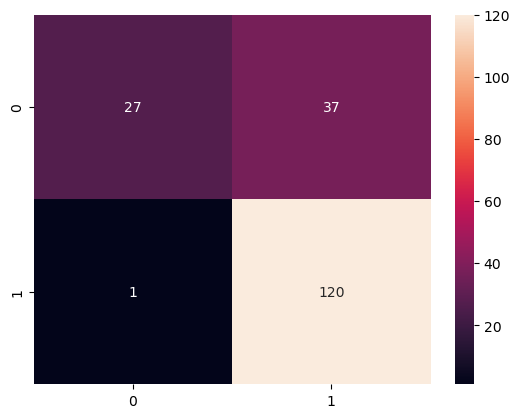

In [64]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

In [65]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           N       0.96      0.42      0.59        64
           Y       0.76      0.99      0.86       121

    accuracy                           0.79       185
   macro avg       0.86      0.71      0.73       185
weighted avg       0.83      0.79      0.77       185



In [66]:
ypred_ts

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [68]:
ypred_tr = lr.predict(xtrain)
ypred_ts = lr.predict(xtest)

tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.8275058275058275, 0.772972972972973)

In [69]:
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[ 26,  38],
       [  4, 117]])

<Axes: >

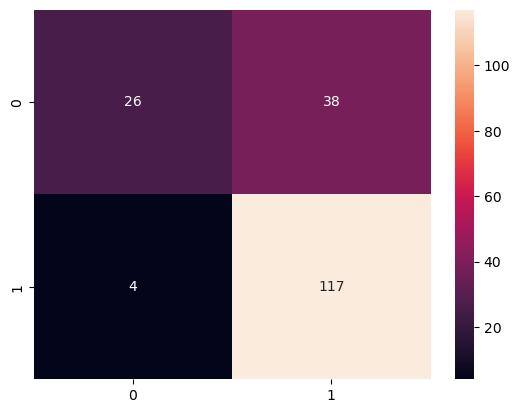

In [70]:

sb.heatmap(cf,annot=True,fmt='d')

In [71]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))


              precision    recall  f1-score   support

           N       0.87      0.41      0.55        64
           Y       0.75      0.97      0.85       121

    accuracy                           0.77       185
   macro avg       0.81      0.69      0.70       185
weighted avg       0.79      0.77      0.75       185



In [72]:
import numpy as np
lambdas = np.arange(0.1,10,0.1)
lambdas

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [73]:
params = {'penalty':['l1','l2'],
          'C':lambdas}

In [74]:
lr = LogisticRegression()
gscv = GridSearchCV(lr,param_grid=params,scoring='accuracy',cv=5)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [75]:
gscv.best_params_

{'C': 0.8, 'penalty': 'l2'}

In [76]:
gscv.best_score_

0.804186046511628

In [77]:

ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

In [78]:
tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.8251748251748252, 0.7945945945945946)

In [79]:
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[ 27,  37],
       [  1, 120]])

<Axes: >

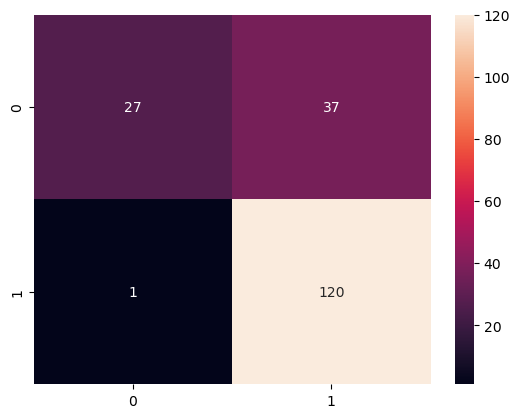

In [80]:
sb.heatmap(cf,annot=True,fmt='d')

In [81]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           N       0.96      0.42      0.59        64
           Y       0.76      0.99      0.86       121

    accuracy                           0.79       185
   macro avg       0.86      0.71      0.73       185
weighted avg       0.83      0.79      0.77       185



In [82]:
best_model.fit(Xnew,Y)

RandomForestClassifier(max_depth=3, random_state=21)

In [83]:
final_ypred_tr = best_model.predict(Xnew)

In [84]:
final_tr_acc = accuracy_score(Y,final_ypred_tr)
final_tr_acc

0.8127035830618893

In [85]:
cf = confusion_matrix(Y,final_ypred_tr)
cf

array([[ 83, 109],
       [  6, 416]])

<Axes: >

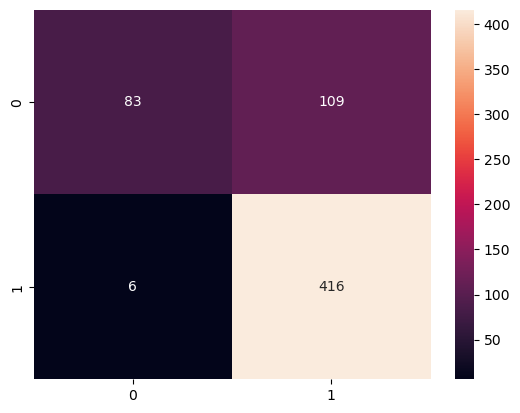

In [86]:
sb.heatmap(cf,annot=True,fmt='d')

In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y,final_ypred_tr))

              precision    recall  f1-score   support

           N       0.93      0.43      0.59       192
           Y       0.79      0.99      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.84      0.81      0.79       614



In [88]:
train["Pred_Loan_Status"]=final_ypred_tr
pred_train = train
pred_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1,Y


In [89]:
testX1= test[con]

In [90]:
testX2= test[cat]

In [91]:
ohe = OneHotEncoder()
testX2 = ohe.fit_transform(testX2).toarray()

In [92]:
cols = ohe.get_feature_names_out()
cols

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [93]:
testX2 = pd.DataFrame(testX2,columns=cols)
testX2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [94]:
testXnew = testX1.join(testX2)

In [95]:
testXnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3076,1500,126.0,360.0,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5000,1800,208.0,360.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2340,2546,100.0,360.0,0.825444,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3276,0,78.0,360.0,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [96]:
final_ypred_test = best_model.predict(testXnew)

In [97]:
test["Pred_Loan_Status"]=final_ypred_test
#test['Pred_Loan_Status'] = le.fit_transform(test['Pred_Loan_Status'])
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


In [98]:
pred_test = test

In [99]:
Q = pred_test[["Loan_ID","Pred_Loan_Status"]]
Q.head()

,Loan_ID,Pred_Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


PS 2: Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

In [100]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y


In [101]:
from Pre_Files import preprocessing
Xnew = preprocessing(train)

In [102]:
Xnew.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N,Pred_Loan_Status_Y
0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,0.065004,0.036192,0.172214,0.74359,1.0,0.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,0.035250,0.000000,0.082489,0.74359,1.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1


In [103]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
model = km.fit(Xnew)
pred = model.fit(Xnew)

In [104]:
wcss = model.inertia_
wcss

1425.4290582551196

In [105]:
k = []
wcss_list = []
for i in range(1,20,1):
    km = KMeans(n_clusters= i)
    model = km.fit(Xnew)
    wcss = model.inertia_
    wcss_list.append(wcss)
    k.append(i)
    print("k =",i,"wcss= ",wcss)

k = 1 wcss=  1971.3418098755376
k = 2 wcss=  1641.9911638717238
k = 3 wcss=  1425.4290582551198
k = 4 wcss=  1318.4061551067896
k = 5 wcss=  1190.9531842630315
k = 6 wcss=  1122.6265037180754
k = 7 wcss=  1052.5755106930087
k = 8 wcss=  988.1521996251245
k = 9 wcss=  972.8395773076493
k = 10 wcss=  913.5816205125291
k = 11 wcss=  886.28529293877
k = 12 wcss=  849.0717486930167
k = 13 wcss=  833.0647556369512
k = 14 wcss=  803.5230887063478
k = 15 wcss=  778.0338119025731
k = 16 wcss=  759.1035177053859
k = 17 wcss=  728.7077752171338
k = 18 wcss=  705.9384987783984
k = 19 wcss=  687.6959576023045


Text(0.5, 1.0, 'Elbow Graph')

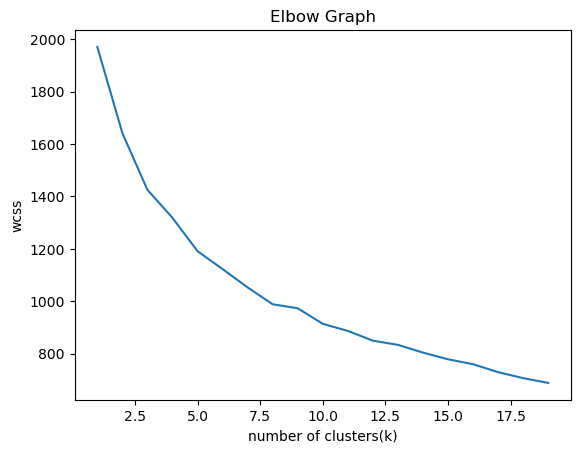

In [106]:
plt.plot(k,wcss_list)
plt.xlabel("number of clusters(k)")
plt.ylabel("wcss")
plt.title("Elbow Graph")

PS 3: If customer is not eligible for the input required amount and duration: a.)what can be amount for the given duration.(Regression)

In [107]:
pred_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1,Y


In [108]:
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


In [109]:
Y = train[['LoanAmount']]
X = train.drop(labels=['LoanAmount','Loan_Status'],axis=1)

In [110]:
cat = []
con = []
for i in X.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [111]:
con

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

In [112]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Pred_Loan_Status']

In [113]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(X[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,0.072651,-0.554368,0.279851,0.45164
1,0.000000,-0.038610,0.279851,0.45164
2,-0.394096,-0.554368,0.279851,0.45164
3,-0.462412,0.252103,0.279851,0.45164
4,0.097389,-0.554368,0.279851,0.45164


In [114]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(X[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N,Pred_Loan_Status_Y
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [115]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N,Pred_Loan_Status_Y
0,0.072651,-0.554368,0.279851,0.45164,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.000000,-0.038610,0.279851,0.45164,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.394096,-0.554368,0.279851,0.45164,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-0.462412,0.252103,0.279851,0.45164,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.097389,-0.554368,0.279851,0.45164,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [116]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(Xnew,Y,test_size=0.3,random_state=31)

In [117]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [118]:
model.intercept_

array([103.53150891])

In [119]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain,tr_pred)
ts_r2 = r2_score(ytest,ts_pred)

print(f'Training R2 Score : {tr_r2:.4f}')
print(f'Testing R2 Score  : {ts_r2:.4f}')

Training R2 Score : 0.3428
Testing R2 Score  : 0.5174


In [120]:
from sklearn.metrics import mean_squared_error
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest, ts_pred)

print(f'Training RMSE : {tr_mse**0.5:.4f}')
print(f'Testing RMSE  : {ts_mse**0.5:.4f}')

Training RMSE : 64.9775
Testing RMSE  : 64.0389


In [121]:
from sklearn.linear_model import Lasso

import numpy as np
lambdas = np.arange(0.01,2,0.01)

In [122]:
tr = []
ts = []
for i in lambdas:
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest,ts_pred)
    tr.append(tr_mse)
    ts.append(ts_mse)

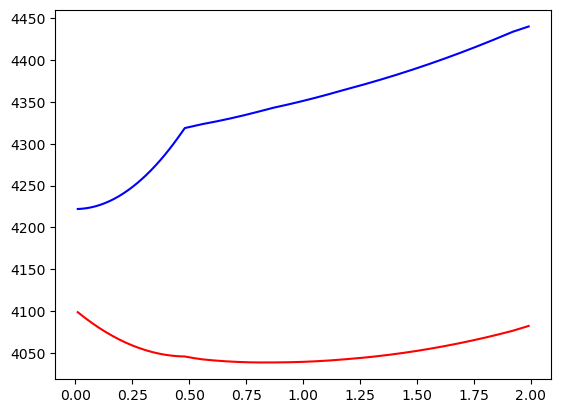

In [123]:
plt.plot(lambdas,tr,c='blue')
plt.plot(lambdas,ts,c='red')

In [124]:
opt_lambda = 0.3

In [125]:
ls = Lasso(alpha=opt_lambda)
model = ls.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_mse = mean_squared_error(ytrain, tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)

print(tr_mse,ts_mse)

4260.00693593769 4053.9752872019503


In [126]:
from sklearn.model_selection import GridSearchCV
tuning_grid = {"alpha": lambdas}
ls = Lasso()
cv = GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 1.9000000000000001}

In [127]:

best_model = cvmodel

In [128]:
model = best_model.fit(xtrain,ytrain)

In [129]:
cols = list(xtrain.columns)
cols

['ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Pred_Loan_Status_N',
 'Pred_Loan_Status_Y']

In [130]:
train_3a = pred_train[pred_train['Pred_Loan_Status']=='N']
train_3a.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,0,N
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.0,Urban,0,N
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.0,Urban,0,N
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,0,N
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.0,Rural,0,N


In [131]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(train_3a[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,-0.258343,0.105501,0.282014,-0.1066
1,-0.202648,-0.429642,0.282014,-0.1066
2,0.284971,-0.429642,0.282014,-0.1066
3,-0.309572,-0.021232,0.282014,-0.1066
4,-0.219686,-0.019950,0.282014,-0.1066


In [132]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(train_3a[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [133]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,-0.258343,0.105501,0.282014,-0.1066,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.202648,-0.429642,0.282014,-0.1066,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.284971,-0.429642,0.282014,-0.1066,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.309572,-0.021232,0.282014,-0.1066,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.219686,-0.019950,0.282014,-0.1066,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [134]:
Xnew['Pred_Loan_Status_Y']=0

In [135]:
pred = model.predict(Xnew)

In [136]:
train_3a['Pred_LoanAmount']=pred
train_3a

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.000000,Semiurban,0,N,147.449754
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.000000,Urban,0,N,118.000798
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.000000,Urban,0,N,134.633510
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.000000,Semiurban,0,N,122.614475
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.000000,Rural,0,N,144.944938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Male,Yes,1,Graduate,No,2787.0,1917.0,146.0,360.0,0.000000,Rural,0,N,151.601481
589,Male,Yes,2,Graduate,Yes,2726.0,0.0,106.0,360.0,0.000000,Semiurban,0,N,140.965778
597,Male,No,0,Graduate,No,2987.0,0.0,88.0,360.0,0.000000,Semiurban,0,N,119.164064
600,Female,No,3+,Graduate,No,416.0,41667.0,350.0,180.0,0.842199,Urban,0,N,260.205777


In [137]:
train_3a[['Pred_Loan_Status',"Loan_Amount_Term","LoanAmount","Pred_LoanAmount"]]

,Pred_Loan_Status,Loan_Amount_Term,LoanAmount,Pred_LoanAmount
7,N,360.0,158.0,147.449754
17,N,360.0,76.0,118.000798
20,N,360.0,104.0,134.633510
22,N,360.0,116.0,122.614475
23,N,360.0,112.0,144.944938
...,...,...,...,...
584,N,360.0,146.0,151.601481
589,N,360.0,106.0,140.965778
597,N,360.0,88.0,119.164064
600,N,180.0,350.0,260.205777


In [138]:
test_pr = test.drop(labels=['Loan_ID','LoanAmount'],axis=1)

In [139]:
cat = []
con = []
for i in test_pr.columns:
    if(test_pr[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [140]:
test_3a = test_pr[test_pr['Pred_Loan_Status']=='N']
test_3a.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status
7,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural,N
13,Male,Yes,2,Graduate,No,12173,0,360.0,0.0,Semiurban,N
25,Male,No,0,Graduate,No,0,24000,360.0,0.0,Rural,N
35,Male,No,0,Graduate,No,3150,0,360.0,0.0,Semiurban,N
55,Male,No,0,Graduate,No,2750,0,360.0,0.0,Urban,N


In [141]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(test_3a[con])
X1= pd.DataFrame(X1, columns= con)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(test_3a[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)

Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,0.061592,-0.567707,0.143794,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,3.730055,-0.567707,0.143794,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-1.655400,6.685376,0.143794,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.261809,-0.567707,0.143794,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.438773,-0.567707,0.143794,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [142]:
Xnew['Pred_Loan_Status_Y']=0

In [143]:
finalts_pred = model.predict(Xnew)

In [144]:
finalts_pred

array([145.6796469 , 286.83565665, 196.41488292, 116.39134759,
       106.17138154, 148.12564411, 114.04178618, 140.54986605,
       128.69496231, 146.24265412, 148.87927876, 155.62997219,
       137.18838757, 171.91874696, 114.47851532,  95.98282041,
       129.51384218, 103.51125396, 120.21848153, 146.44908623,
       270.02814771, 169.19321468, 150.32839993, 186.46470622,
       212.07323828, 123.26063087, 113.26546467,  92.33220936,
        91.9034381 , 127.01955211, 117.04152654, 119.37090299,
       159.29697064, 135.50907616, 162.85910649, 125.10875629,
       173.06548861, 166.1951608 , 156.57850194, 111.95805878,
       128.92462847, 144.05752637, 129.81561811, 132.2943399 ,
       141.19571076, 118.91831829, 146.96195535, 191.6437525 ,
       179.79831702, 122.27338535, 138.85392638, 115.42374893,
       184.63742586, 149.68356265, 101.80268122, 107.69491212,
       155.90923521, 145.50452161, 154.84253923])

In [145]:
pred_test = pred_test[pred_test['Pred_Loan_Status']=='N']
pred_test["Pred_LoanAmount"]= finalts_pred
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N,145.679647
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N,286.835657
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N,196.414883
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N,116.391348
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N,106.171382


In [146]:
Q = pred_test[["Loan_ID","Pred_Loan_Status","Loan_Amount_Term","LoanAmount","Pred_LoanAmount"]]
Q.head()

,Loan_ID,Pred_Loan_Status,Loan_Amount_Term,LoanAmount,Pred_LoanAmount
7,LP001056,N,360.0,147.0,145.679647
13,LP001094,N,360.0,166.0,286.835657
25,LP001153,N,360.0,148.0,196.414883
35,LP001203,N,360.0,176.0,116.391348
55,LP001313,N,360.0,130.0,106.171382


PS 3(b): if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [147]:
train_3a.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,0,N,147.449754
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.0,Urban,0,N,118.000798
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.0,Urban,0,N,134.633510
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,0,N,122.614475
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.0,Rural,0,N,144.944938


In [148]:
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N,145.679647
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N,286.835657
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N,196.414883
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N,116.391348
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N,106.171382


In [149]:
Y = train_3a[['Loan_Amount_Term']]
X = train_3a.drop(labels=['Loan_Amount_Term','Loan_Status'],axis=1)

In [150]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [151]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(X[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(X[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,-0.258343,0.105501,0.199609,-0.1066,0.073754,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.202648,-0.429642,-0.960822,-0.1066,-0.607263,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.284971,-0.429642,-0.564577,-0.1066,-0.222626,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.309572,-0.021232,-0.394758,-0.1066,-0.500570,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.219686,-0.019950,-0.451364,-0.1066,0.015829,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [152]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [153]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [154]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain,tr_pred)
ts_r2 = r2_score(ytest,ts_pred)

print(f'Training R2 Score : {tr_r2:.4f}')
print(f'Testing R2 Score  : {ts_r2:.4f}')

Training R2 Score : 1.0000
Testing R2 Score  : 1.0000


In [155]:
from sklearn.metrics import mean_squared_error
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest, ts_pred)

print(f'Training RMSE : {tr_mse**0.5:.4f}')
print(f'Testing RMSE  : {ts_mse**0.5:.4f}')

Training RMSE : 0.0000
Testing RMSE  : 0.0000


In [156]:
from sklearn.linear_model import Lasso

import numpy as np
lambdas = np.arange(0.01,1,0.01)

In [157]:
tr = []
ts = []
for i in lambdas:
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest,ts_pred)
    tr.append(tr_mse)
    ts.append(ts_mse)

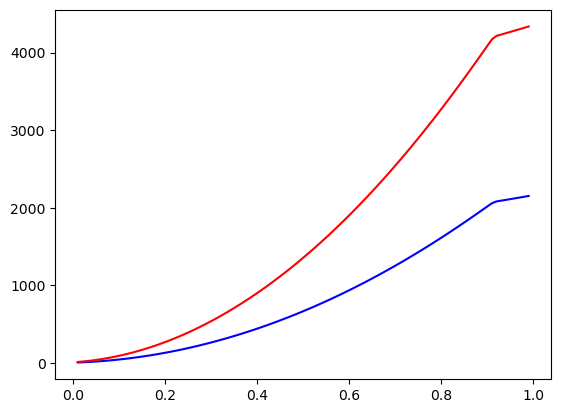

In [158]:
plt.plot(lambdas,tr,c='blue')
plt.plot(lambdas,ts,c='red')

In [159]:
opt_lambda = 0.01

In [160]:
ls = Lasso(alpha=opt_lambda)
model = ls.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_mse = mean_squared_error(ytrain, tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)

print(tr_mse,ts_mse)

5.518018555979778 12.144846489688447


In [161]:
from sklearn.model_selection import GridSearchCV
tuning_grid = {"alpha": lambdas}

ls = Lasso()
cv = GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)

cvmodel.best_params_

{'alpha': 0.01}

In [162]:
best_model = cvmodel
model = best_model.fit(xtrain,ytrain)

In [163]:
cols = list(xtrain.columns)
cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Pred_LoanAmount',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Pred_Loan_Status_N']

In [164]:
train_3b = train_3a[train_3a['Loan_Amount_Term']>=240]
train_3b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,0,N,147.449754
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.0,Urban,0,N,118.000798
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.0,Urban,0,N,134.633510
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,0,N,122.614475
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.0,Rural,0,N,144.944938


In [165]:
train_3b = train_3b.drop(labels=['Loan_Amount_Term','Loan_Status'],axis=1)
train_3b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,0.0,Semiurban,N,147.449754
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,0.0,Urban,N,118.000798
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,0.0,Urban,N,134.633510
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,0.0,Semiurban,N,122.614475
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,0.0,Rural,N,144.944938


In [166]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(train_3b[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount
0,-0.270672,0.502323,0.189205,0.0,0.073044
1,-0.217794,-0.709505,-0.992335,0.0,-0.606880
2,0.245169,-0.709505,-0.588882,0.0,-0.222860
3,-0.319311,0.215336,-0.415974,0.0,-0.500359
4,-0.233970,0.218240,-0.473610,0.0,0.015212


In [167]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(train_3a[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [168]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,-0.270672,0.502323,0.189205,0.0,0.073044,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.217794,-0.709505,-0.992335,0.0,-0.606880,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.245169,-0.709505,-0.588882,0.0,-0.222860,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.319311,0.215336,-0.415974,0.0,-0.500359,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.233970,0.218240,-0.473610,0.0,0.015212,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [169]:
pred = model.predict(Xnew)


In [170]:
pred = model.predict(Xnew)

In [171]:
train_3b['Pred_Loan_Amount_Term']=pred

train_3b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount,Pred_Loan_Amount_Term
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,0.0,Semiurban,N,147.449754,242.478141
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,0.0,Urban,N,118.000798,458.433344
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,0.0,Urban,N,134.633510,474.277473
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,0.0,Semiurban,N,122.614475,292.140474
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,0.0,Rural,N,144.944938,293.220894


In [172]:
Q= train_3b[['Pred_Loan_Status',"Pred_Loan_Amount_Term","LoanAmount"]]
Q.head()

,Pred_Loan_Status,Pred_Loan_Amount_Term,LoanAmount
7,N,242.478141,158.0
17,N,458.433344,76.0
20,N,474.277473,104.0
22,N,292.140474,116.0
23,N,293.220894,112.0


In [173]:
test_3b = pred_test[pred_test['Loan_Amount_Term']>=240]
test_3b.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N,145.679647
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N,286.835657
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N,196.414883
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N,116.391348
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N,106.171382


In [174]:
cat = []
con = []
for i in test_3b.columns:
    if(test_3b[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [175]:
cat.remove('Loan_ID')
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Pred_Loan_Status']

In [176]:
con.remove('Loan_Amount_Term')
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Pred_LoanAmount']

In [177]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(test_3b[con])
X1= pd.DataFrame(X1, columns= con)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(test_3b[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)

Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,0.060491,-0.551353,0.214184,0.0,0.004795,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,3.597004,-0.551353,0.661866,0.0,3.751061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-1.594743,6.437697,0.237746,0.0,1.351303,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.251278,-0.551353,0.897488,0.0,-0.772514,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.421877,-0.551353,-0.186374,0.0,-1.043750,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [178]:
finalts_pred = model.predict(Xnew)

In [179]:
finalts_pred = model.predict(Xnew)

In [180]:
finalts_pred

array([326.14876661, 791.34732722, 483.86506259, 242.21479818,
       209.04802497, 333.95017233, 227.04488402, 321.7568292 ,
       277.37145105, 328.23119807, 336.9531593 , 457.00971778,
       408.94570837, 329.87406472, 174.05715689, 248.05884566,
       198.81030297, 236.94491206, 331.94160372, 754.46427055,
       414.5773443 , 347.66952331, 465.46830874, 553.2475799 ,
       255.75520144, 229.08169604, 168.0944015 , 158.26979246,
       260.86425975, 244.73238964, 370.10867154, 289.24634022,
       380.35364224, 258.74503066, 422.48985016, 395.67338709,
       367.04089135, 227.73424291, 279.31448872, 326.17176111,
       274.41124903, 409.50932094, 243.48743682, 433.28619443,
       468.64109837, 437.77411104, 260.05716176, 307.8356158 ,
       234.03558328, 454.23305417, 334.26318564, 192.1899298 ,
       365.93622221, 326.11105154])

In [181]:
pred_test = test_3b[test_3b['Pred_Loan_Status']=='N']
pred_test["Pred_Loan_Amount_Term"]= finalts_pred
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount,Pred_Loan_Amount_Term
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N,145.679647,326.148767
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N,286.835657,791.347327
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N,196.414883,483.865063
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N,116.391348,242.214798
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N,106.171382,209.048025


In [182]:
H = pred_test[["Loan_ID","Pred_Loan_Status","Loan_Amount_Term","Pred_Loan_Amount_Term","LoanAmount","Pred_LoanAmount"]]
H.head()

,Loan_ID,Pred_Loan_Status,Loan_Amount_Term,Pred_Loan_Amount_Term,LoanAmount,Pred_LoanAmount
7,LP001056,N,360.0,326.148767,147.0,145.679647
13,LP001094,N,360.0,791.347327,166.0,286.835657
25,LP001153,N,360.0,483.865063,148.0,196.414883
35,LP001203,N,360.0,242.214798,176.0,116.391348
55,LP001313,N,360.0,209.048025,130.0,106.171382


In [183]:
H.to_csv("/home/guruji/Elthive Class/Submission.csv")